# Hand Written Digit Prediction




The digits consists of 8x8 pixel images of digits

## import library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt

## import data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

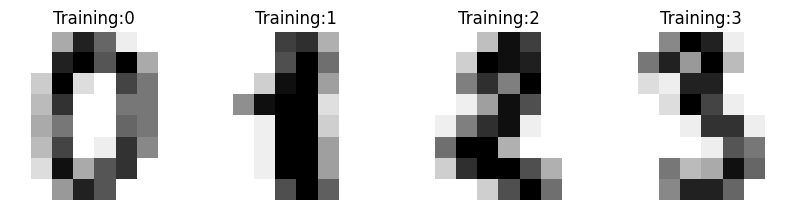

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i" %label)

## data preprocessing

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)


## scaling image data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **train test split data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(data, df.target, test_size=0.3)


In [ ]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)


RandomForestClassifier()

## predict test data

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

array([6, 3, 2, 2, 6, 3, 4, 0, 5, 7, 7, 9, 3, 5, 4, 1, 1, 2, 7, 9, 7, 4,
       5, 6, 6, 1, 5, 8, 8, 8, 0, 4, 0, 9, 6, 1, 9, 2, 1, 2, 6, 3, 3, 4,
       8, 1, 8, 5, 0, 4, 1, 0, 2, 4, 4, 9, 5, 3, 5, 1, 2, 8, 0, 1, 9, 4,
       8, 2, 1, 7, 8, 6, 2, 6, 3, 8, 3, 5, 6, 7, 9, 4, 5, 1, 0, 3, 9, 8,
       0, 6, 6, 8, 4, 2, 7, 1, 2, 8, 5, 9, 1, 9, 2, 6, 6, 0, 1, 0, 1, 2,
       0, 6, 6, 7, 0, 9, 7, 6, 2, 4, 9, 8, 2, 4, 6, 2, 1, 1, 4, 0, 8, 5,
       0, 9, 3, 5, 2, 9, 3, 0, 5, 4, 5, 5, 8, 8, 4, 5, 0, 5, 7, 9, 6, 1,
       4, 5, 9, 0, 8, 5, 5, 0, 5, 5, 6, 0, 1, 1, 9, 3, 3, 5, 0, 0, 7, 1,
       4, 9, 2, 9, 7, 5, 1, 2, 8, 4, 1, 1, 7, 6, 5, 8, 3, 6, 6, 5, 4, 7,
       7, 0, 6, 7, 2, 8, 3, 1, 3, 7, 9, 0, 7, 7, 6, 5, 2, 1, 3, 0, 7, 5,
       6, 0, 9, 0, 4, 8, 0, 7, 7, 9, 8, 3, 7, 7, 0, 2, 8, 6, 5, 4, 8, 7,
       2, 5, 1, 1, 4, 1, 6, 4, 4, 9, 3, 7, 4, 8, 9, 5, 7, 7, 1, 7, 8, 4,
       6, 4, 4, 6, 7, 4, 3, 5, 8, 2, 1, 6, 0, 4, 2, 3, 5, 3, 7, 4, 5, 8,
       2, 1, 2, 1, 0, 5, 4, 4, 8, 4, 4, 8, 6, 5, 1,

## model accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
confusion_matrix(y_test,y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 60,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  1,  1],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.98      1.00      0.99        57
           2       0.98      0.98      0.98        53
           3       0.98      0.98      0.98        49
           4       1.00      0.98      0.99        65
           5       1.00      1.00      1.00        60
           6       1.00      0.98      0.99        56
           7       0.98      0.96      0.97        48
           8       0.95      0.95      0.95        58
           9       0.98      1.00      0.99        47

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

